In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("test_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [4]:
data.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


Como as colunas city_name e avg_precipitation possuem apenas 1 valor, podemos retirá-las, já que não vão ter nenhuma influência na previsão

In [5]:
data.nunique()



data2 = data.drop(['city_name', 'avg_precipitation'], axis=1)
test_data2 = test_data.drop(['city_name', 'avg_precipitation'], axis=1)

In [6]:
data2.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


In [7]:
data2.isnull().sum()

magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_rain               0
incidents              0
dtype: int64

<AxesSubplot:>

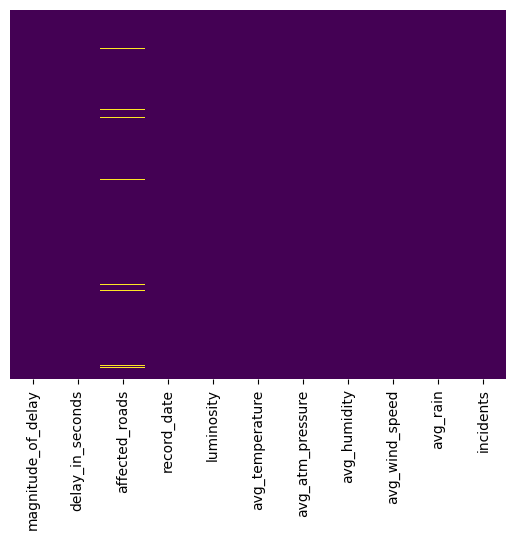

In [8]:
sns.heatmap(data2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

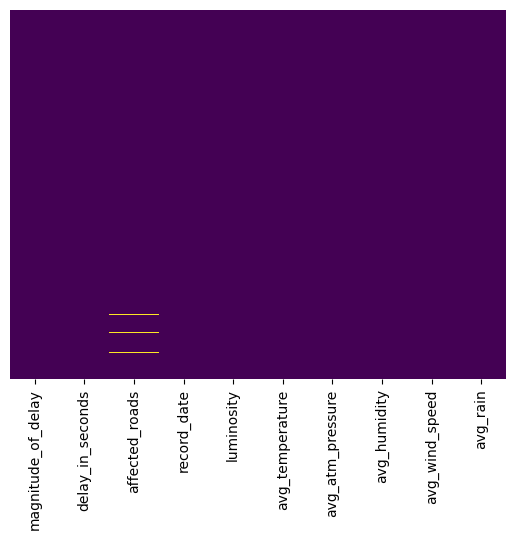

In [9]:
sns.heatmap(test_data2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
data2['affected_roads'].head()

0                                                    ,
1                                                N101,
2                                                    ,
3    N101,R206,N105,N101,N101,N101,N101,N101,N101,N...
4                            N101,N101,N101,N101,N101,
Name: affected_roads, dtype: object

<AxesSubplot:>

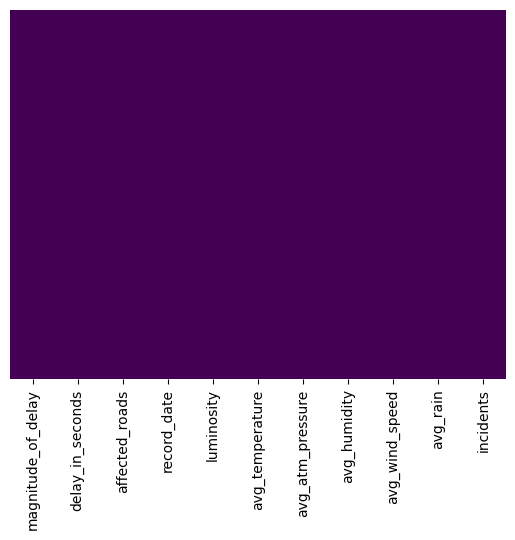

In [11]:
data3 = data2.dropna()
sns.heatmap(data3.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Como os valores dos incidentes, a nossa label, são categóricos, estes não poderão ser submetidos à maioria dos modelos de ML disponíveis. Assim, teremos de convertê-los para valores numéricos

In [12]:
replace_map = {'incidents' : {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High':4}}

data4 = data3.replace(replace_map)
data4.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,0
1,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,0
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,1
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,4
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,3


Como podemos ver, agora o tipo do feature Incidents é numérico

In [13]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4915 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  4915 non-null   object 
 1   delay_in_seconds    4915 non-null   int64  
 2   affected_roads      4915 non-null   object 
 3   record_date         4915 non-null   object 
 4   luminosity          4915 non-null   object 
 5   avg_temperature     4915 non-null   float64
 6   avg_atm_pressure    4915 non-null   float64
 7   avg_humidity        4915 non-null   float64
 8   avg_wind_speed      4915 non-null   float64
 9   avg_rain            4915 non-null   object 
 10  incidents           4915 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 460.8+ KB


Agora vamos tratar das datas

In [14]:
data4['record_date'].head()

0    2021-03-15 23:00
1    2021-12-25 18:00
2    2021-03-12 15:00
3    2021-09-29 09:00
4    2021-06-13 11:00
Name: record_date, dtype: object

In [15]:
data4['record_date'] = pd.to_datetime(data4['record_date'], format = "%Y-%m-%d %H:%M", errors='coerce')
assert data4['record_date'].isnull().sum() == 0, 'missing record date'
data4['record_date'].head()

test_data2['record_date'] = pd.to_datetime(test_data2['record_date'], format = "%Y-%m-%d %H:%M", errors='coerce')

In [16]:
data4['record_date_year'] = data4['record_date'].dt.year
data4['record_date_month'] = data4['record_date'].dt.month
data4['record_date_day'] = data4['record_date'].dt.day
data4['record_date_hour'] = data4['record_date'].dt.hour
data4['record_date_minute'] = data4['record_date'].dt.minute

test_data2['record_date_year'] = test_data2['record_date'].dt.year
test_data2['record_date_month'] = test_data2['record_date'].dt.month
test_data2['record_date_day'] = test_data2['record_date'].dt.day
test_data2['record_date_hour'] = test_data2['record_date'].dt.hour
test_data2['record_date_minute'] = test_data2['record_date'].dt.minute


data4.head()
test_data2.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute
0,UNDEFINED,1211,"N101,N101,N101,N101,N101,N101,",2021-04-13 19:00:00,LIGHT,15.0,1018.0,80.0,0.0,Sem Chuva,2021,4,13,19,0
1,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-13 04:00:00,DARK,16.0,1018.0,41.0,2.0,Sem Chuva,2021,10,13,4,0
2,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-18 19:00:00,LIGHT,22.0,1017.0,71.0,0.0,Sem Chuva,2021,7,18,19,0
3,UNDEFINED,140,"N101,R206,N101,N101,N101,N101",2021-10-30 15:00:00,LIGHT,18.0,1008.0,81.0,3.0,Sem Chuva,2021,10,30,15,0
4,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-18 10:00:00,LIGHT,20.0,1022.0,86.0,0.0,Sem Chuva,2021,10,18,10,0


In [17]:
data4.nunique()

magnitude_of_delay       3
delay_in_seconds      1176
affected_roads         678
record_date           4915
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_rain                 4
incidents                5
record_date_year         1
record_date_month       11
record_date_day         31
record_date_hour        24
record_date_minute       1
dtype: int64

Aqui podemos verificar que o ano dos incidentes, bem como o minuto, são features com um único valor, sendo então essa informação inútil.

In [18]:
data5 = data4.drop(['record_date_minute','record_date_year', 'record_date', 'affected_roads'], axis = 1)
test_data3 = test_data2.drop(['record_date_minute','record_date_year', 'record_date', 'affected_roads'], axis = 1)
print(data5['magnitude_of_delay'].unique())
print(data5['luminosity'].unique())
print(data5['avg_rain'].unique())
#data5.info()

['UNDEFINED' 'MAJOR' 'MODERATE']
['DARK' 'LIGHT' 'LOW_LIGHT']
['Sem Chuva' 'chuva moderada' 'chuva fraca' 'chuva forte']


A 'magnitude_of_delay' tem 3 valores possíveis: UNDEFINED, MAJOR e MODERATE <br>
A luminosidade tem 3 valores possíveis: LIGHT, LOW_LIGHT, DARK <br>
A 'avg_rain' tem 4 valores possíveis: Sem Chuva, chuva moderada, chuva fraca, chuva forte <br>
Assim, teremos de transformar estes valores em valores numéricos, fazendo label enconding


In [19]:
replace_map = { 'magnitude_of_delay' : {'UNDEFINED': 0, 'MODERATE': 1, 'MAJOR': 2}, 
                'luminosity': {'DARK': 0, 'LIGHT': 1, 'LOW_LIGHT': 2},
                'avg_rain': {'Sem Chuva': 0, 'chuva moderada': 1, 'chuva fraca': 2, 'chuva forte': 3}
              }
data6 = data5.replace(replace_map)
test_data4 = test_data3.replace(replace_map)

data6.head()
test_data4.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,record_date_month,record_date_day,record_date_hour
0,0,1211,1,15.0,1018.0,80.0,0.0,0,4,13,19
1,0,0,0,16.0,1018.0,41.0,2.0,0,10,13,4
2,0,0,1,22.0,1017.0,71.0,0.0,0,7,18,19
3,0,140,1,18.0,1008.0,81.0,3.0,0,10,30,15
4,0,0,1,20.0,1022.0,86.0,0.0,0,10,18,10


Depois de feita toda a etapa de feature engineering, vamos agora construir um modelo de regressão logística.

In [20]:
df = data6
df_test = test_data4

X = df.drop('incidents', axis=1)
y = df['incidents']
X_test = df_test

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=2022)

In [22]:
clf.fit(X, y)

DecisionTreeClassifier(random_state=2022)

In [23]:
predictions_dt = clf.predict(X_test)
predictions_dt

array([4, 0, 0, ..., 2, 1, 3])

In [37]:
#replace_map = {'incidents' : {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High':4}}

outcome = []
for i in range(len(predictions_dt)):
    if predictions_dt[i] == 0:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'None'})
    elif predictions_dt[i] == 1:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Low'})
    elif predictions_dt[i] == 2:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Medium'})
    elif predictions_dt[i] == 3:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'High'})
    elif predictions_dt[i] == 4:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Very_High'})
    
print(outcome)
od = pd.DataFrame(outcome)
od.to_csv("out_file.csv", index=False,header=True)



[{'RowId': 1, 'Incidents': 'Very_High'}, {'RowId': 2, 'Incidents': 'None'}, {'RowId': 3, 'Incidents': 'None'}, {'RowId': 4, 'Incidents': 'Low'}, {'RowId': 5, 'Incidents': 'None'}, {'RowId': 6, 'Incidents': 'Very_High'}, {'RowId': 7, 'Incidents': 'Very_High'}, {'RowId': 8, 'Incidents': 'None'}, {'RowId': 9, 'Incidents': 'High'}, {'RowId': 10, 'Incidents': 'Medium'}, {'RowId': 11, 'Incidents': 'None'}, {'RowId': 12, 'Incidents': 'Very_High'}, {'RowId': 13, 'Incidents': 'Medium'}, {'RowId': 14, 'Incidents': 'High'}, {'RowId': 15, 'Incidents': 'None'}, {'RowId': 16, 'Incidents': 'High'}, {'RowId': 17, 'Incidents': 'Very_High'}, {'RowId': 18, 'Incidents': 'None'}, {'RowId': 19, 'Incidents': 'Low'}, {'RowId': 20, 'Incidents': 'Medium'}, {'RowId': 21, 'Incidents': 'None'}, {'RowId': 22, 'Incidents': 'Low'}, {'RowId': 23, 'Incidents': 'None'}, {'RowId': 24, 'Incidents': 'Low'}, {'RowId': 25, 'Incidents': 'High'}, {'RowId': 26, 'Incidents': 'High'}, {'RowId': 27, 'Incidents': 'None'}, {'RowId':